### Import 

In [7]:
# %pip install matplotlib

In [28]:
import matplotlib.pyplot as plt

In [30]:
import pandas as pd

### Load Data

In [22]:
!ls

ecommerce_orders.csv      matplotlib_examples.ipynb


In [11]:
df = pd.read_csv('ecommerce_orders.csv')
print (df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          10 non-null     int64  
 1   customer_id       10 non-null     object 
 2   order_date        10 non-null     object 
 3   product_category  10 non-null     object 
 4   payment_method    10 non-null     object 
 5   quantity          10 non-null     int64  
 6   unit_price        10 non-null     float64
 7   order_amount      10 non-null     float64
 8   discount_applied  10 non-null     float64
 9   shipping_cost     10 non-null     float64
 10  delivery_state    10 non-null     object 
 11  order_status      10 non-null     object 
dtypes: float64(4), int64(2), object(6)
memory usage: 1.1+ KB
None


,order_id,customer_id,order_date,product_category,payment_method,quantity,unit_price,order_amount,discount_applied,shipping_cost,delivery_state,order_status
0,1001,C001,2024-04-01,Electronics,Credit Card,1,499.99,499.99,0.0,5.99,CA,Delivered
1,1002,C002,2024-04-01,Clothing,PayPal,3,29.99,89.97,10.0,0.00,NY,Delivered
2,1003,C003,2024-04-02,Home,Credit Card,2,75.00,150.00,15.0,5.99,TX,Delivered
3,1004,C004,2024-04-02,Toys,COD,1,19.99,19.99,0.0,3.99,NV,Cancelled
4,1005,C005,2024-04-03,Books,PayPal,4,15.00,60.00,0.0,0.00,CA,Delivered


### Line Plot
API: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

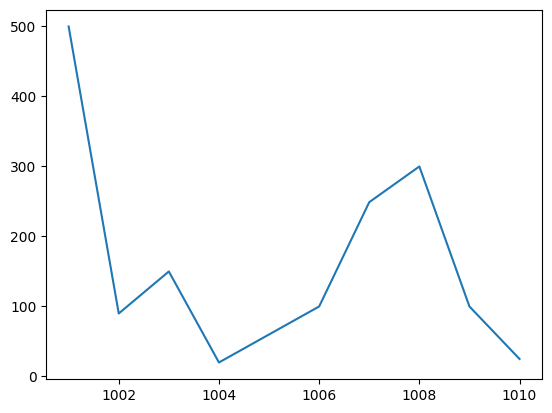

In [13]:
#Lineplot between order_id and order_amount
# Simplest plot
plt.plot(df['order_id'], df['order_amount'])

plt.show()

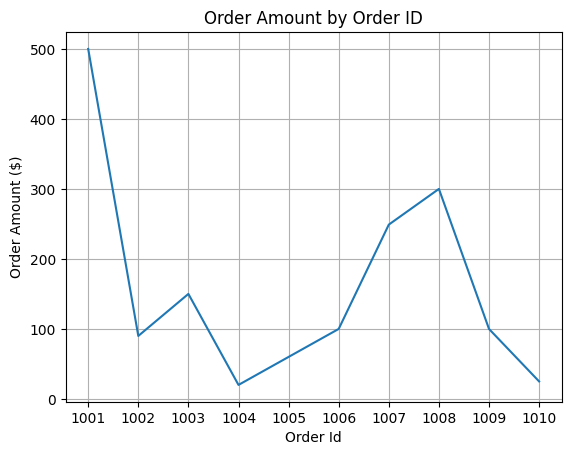

In [56]:
# A more user friendly Line plot between order_id and order_amount
plt.plot(df['order_id'], df['order_amount'])

#Title
plt.title('Order Amount by Order ID')

#Label x and y
plt.xlabel('Order Id')
plt.ylabel('Order Amount ($)')

#Show grid
plt.grid(True)

#Range on X axis
plt.xticks(df['order_id'])

plt.show()

### Bar charts
Total Revenue by Product Category

API: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

API: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html

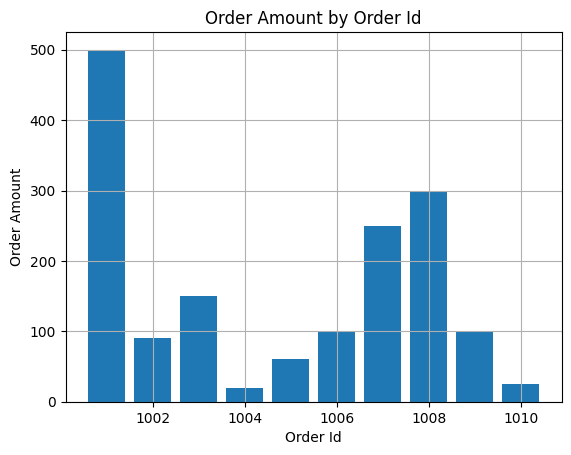

In [35]:
#Vertical bar
# plt.bar(revenue_by_category.index, revenue_by_category.values)
plt.bar(df['order_id'], df['order_amount'])

# Routine calls - create title, x axis label, y axis label, grid etc
plt.title('Order Amount by Order Id')
plt.xlabel('Order Id')
plt.ylabel('Order Amount')
plt.grid(axis='both')

plt.show()


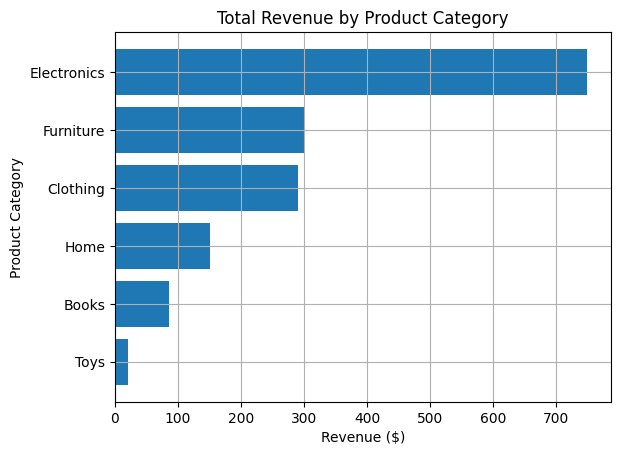

In [119]:
#Horizontal bar
plt.barh(revenue_by_category.index, revenue_by_category.values)

# Routine calls - create title, x axis label, y axis label, grid etc
plt.title('Total Revenue by Product Category')
plt.xlabel('Revenue ($)')
plt.ylabel('Product Category')
plt.grid(axis='both')

plt.show()

### Histograms

API: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Histogram of Order Amounts

Histogram of Shipping Costs

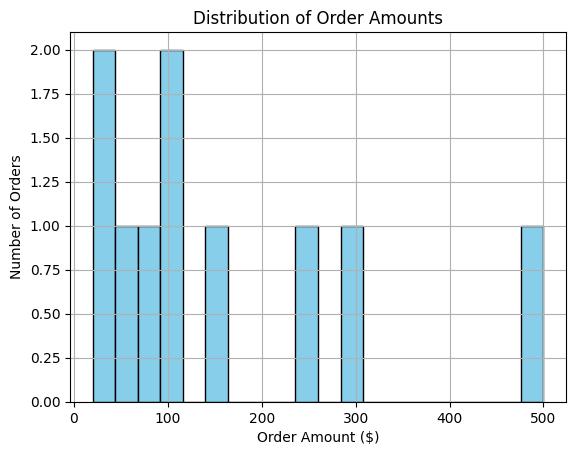

In [161]:
# Histogram of Order Amounts
# Simplest Histogram
# plt.hist(df['order_amount'], bins=20)
# Adding graph color and histogram border color
plt.hist(df['order_amount'], bins=20, color='skyblue', edgecolor='black')

# Routine calls - create title, x axis label, y axis label, grid etc
plt.title('Distribution of Order Amounts')
plt.xlabel('Order Amount ($)')
plt.ylabel('Number of Orders')
plt.grid(True)

plt.show()

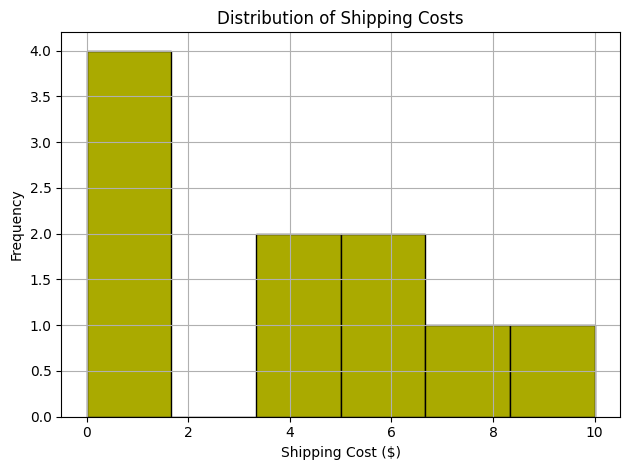

In [163]:
#Histogram of Shipping Costs

plt.hist(df['shipping_cost'], bins=6, color='#aaaa00', edgecolor='black')
# Refer color options at https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def

# Routine calls - create title, x axis label, y axis label, grid etc
plt.title('Distribution of Shipping Costs')
plt.xlabel('Shipping Cost ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

### Scatter plots

API: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

Order Amount vs. Quantity


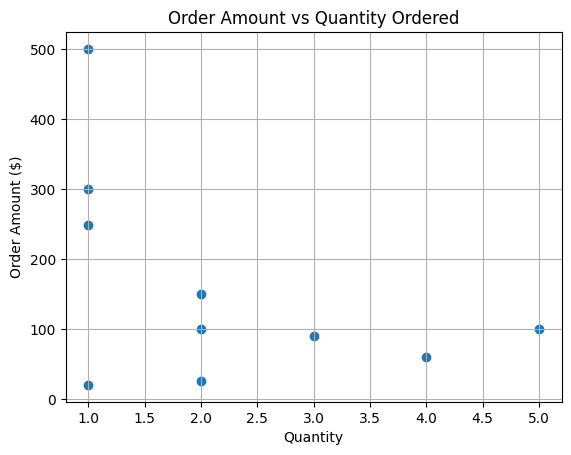

In [167]:
#Order Amount vs. Quantity
plt.scatter(df['quantity'], df['order_amount'])

# Routine calls - create title, x axis label, y axis label, grid etc
plt.title('Order Amount vs Quantity Ordered')
plt.xlabel('Quantity')
plt.ylabel('Order Amount ($)')
plt.grid(True)

plt.show()

### Pie charts
API: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

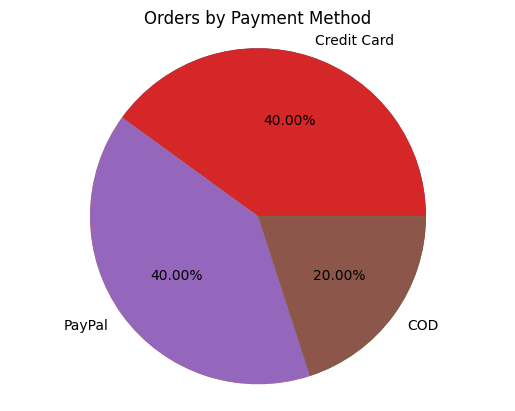

In [204]:
# Count orders per payment method
payment_counts = df['payment_method'].value_counts()

plt.pie(payment_counts)
plt.pie(payment_counts, labels=payment_counts.index, autopct='%.2f%%')

plt.title('Orders by Payment Method')
plt.axis('equal')

plt.show()

### Subplots and layouts

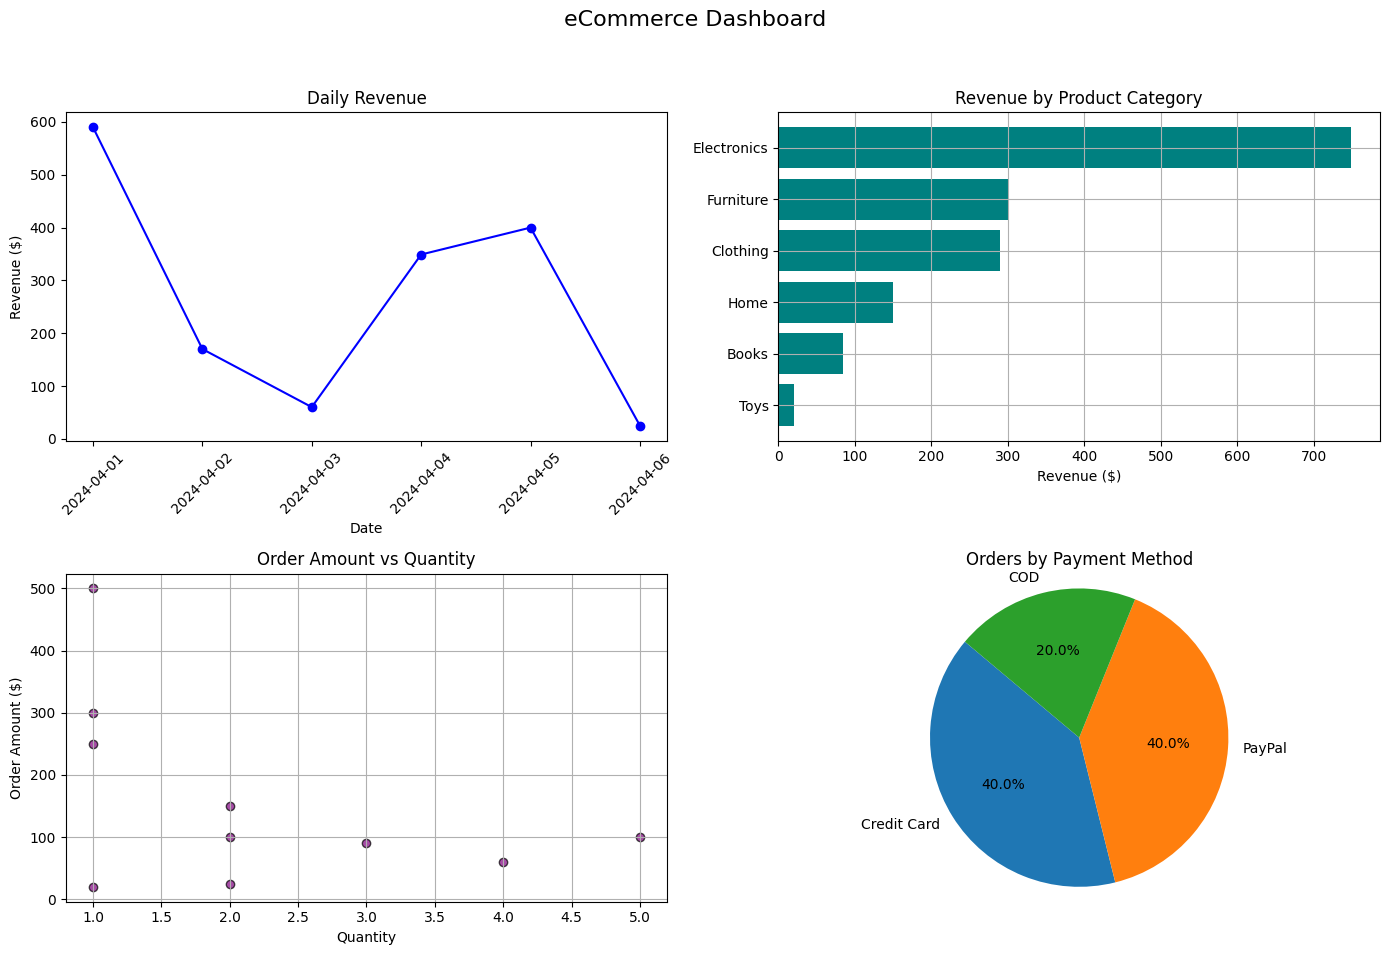

In [214]:
# Set up figure and layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('eCommerce Dashboard', fontsize=16)

# Line Plot: Daily Revenue
daily_revenue = df.groupby('order_date')['order_amount'].sum()
axs[0, 0].plot(daily_revenue.index, daily_revenue.values, marker='o', color='blue')
axs[0, 0].set_title('Daily Revenue')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Revenue ($)')
axs[0, 0].tick_params(axis='x', rotation=45)

# Bar Chart: Revenue by Product Category
revenue_by_category = df.groupby('product_category')['order_amount'].sum().sort_values()
axs[0, 1].barh(revenue_by_category.index, revenue_by_category.values, color='teal')
axs[0, 1].set_title('Revenue by Product Category')
axs[0, 1].set_xlabel('Revenue ($)')
axs[0, 1].grid(True)

# Scatter Plot: Quantity vs Order Amount
axs[1, 0].scatter(df['quantity'], df['order_amount'], alpha=0.7, color='purple', edgecolors='black')
axs[1, 0].set_title('Order Amount vs Quantity')
axs[1, 0].set_xlabel('Quantity')
axs[1, 0].set_ylabel('Order Amount ($)')
axs[1, 0].grid(True)

# Pie Chart: Orders by Payment Method
payment_counts = df['payment_method'].value_counts()
axs[1, 1].pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Orders by Payment Method')
axs[1, 1].axis('equal')  # Keeps pie chart circular

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the suptitle
plt.show()
